In [21]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import mnist_reader

In [22]:
training_images, training_labels = mnist_reader.load_mnist('', kind='train')
test_images, test_labels = mnist_reader.load_mnist('', kind='t10k')
images = np.array(list(training_images) + list(test_images))
session = tf.InteractiveSession()

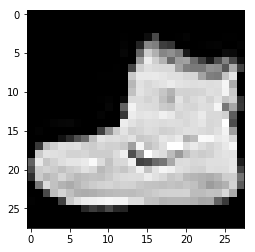

In [23]:
plt.imshow(images[0].reshape(28, 28), cmap='gray')
plt.show()

In [24]:
# Training Parameters
learning_rate = 0.00001
num_steps = 30000
batch_size = 2

display_step = 1000
examples_to_show = 10


num_hidden_1 = 512 
num_hidden_2 = 256 
num_input = 784 


X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [25]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [26]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X


loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)


init = tf.global_variables_initializer()

In [29]:
sess = tf.Session()
sess.run(init)


# Training
for index in range(num_steps+1):
    batch_x = training_images[index * batch_size: (index + 1) * batch_size]
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    if index % display_step == 0 or index == 1:
        print('Step %i: Minibatch Loss: %f' % (index, l)) 

Step 0: Minibatch Loss: 20707.328125
Step 1: Minibatch Loss: 5724.971191
Step 1000: Minibatch Loss: 14286.298828
Step 2000: Minibatch Loss: 20568.470703
Step 3000: Minibatch Loss: 19394.763672
Step 4000: Minibatch Loss: 7622.086914
Step 5000: Minibatch Loss: 7732.987305
Step 6000: Minibatch Loss: 19386.748047
Step 7000: Minibatch Loss: 7578.082031
Step 8000: Minibatch Loss: 11822.607422
Step 9000: Minibatch Loss: 26541.583984
Step 10000: Minibatch Loss: 13587.841797
Step 11000: Minibatch Loss: 17009.966797
Step 12000: Minibatch Loss: 13310.207031
Step 13000: Minibatch Loss: 6905.956055
Step 14000: Minibatch Loss: 6462.177734
Step 15000: Minibatch Loss: 12771.833008
Step 16000: Minibatch Loss: 9677.668945
Step 17000: Minibatch Loss: 12702.824219
Step 18000: Minibatch Loss: 18963.359375
Step 19000: Minibatch Loss: 11639.704102
Step 20000: Minibatch Loss: 5020.434082
Step 21000: Minibatch Loss: 17771.312500
Step 22000: Minibatch Loss: 13313.187500
Step 23000: Minibatch Loss: 11444.688477


In [30]:
reconstructed_images = []
g = sess.run(decoder_op, feed_dict={X:images})
reconstructed_images = list(g)

In [31]:
np.array(reconstructed_images).shape

(70000, 784)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(reconstructed_images[:60000], training_labels)
print("Predicting")
predicted_labels = log_reg.predict(reconstructed_images[60000:])
print("Calculating score")
score = accuracy_score(test_labels,predicted_labels)
print("Accuracy of predictions: " ,score * 100, "%")

In [32]:
test_image_index = 7

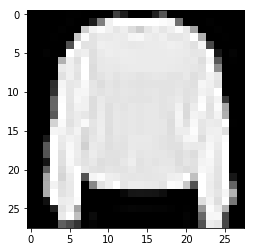

In [33]:
plt.imshow(training_images[test_image_index].reshape(28,28), cmap='gray')
plt.show()

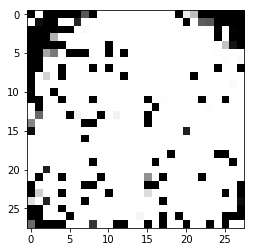

In [34]:
plt.imshow(reconstructed_images[test_image_index].reshape(28,28), cmap='gray')
plt.show()

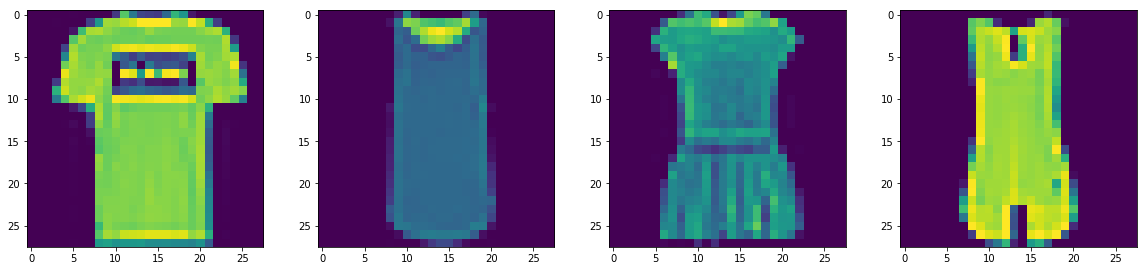

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 4
for i in range(1, rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(training_images[i].reshape(28,28))

plt.show()

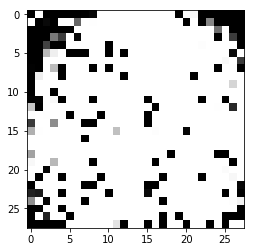

In [36]:
plt.imshow(reconstructed_images[4].reshape(28,28), cmap='gray')
plt.show()

In [37]:
reconstructed_images_reduced_dim = []
g = sess.run(encoder_op, feed_dict={X:images})
reconstructed_images_reduced_dim = list(g)

In [38]:
np.array(reconstructed_images_reduced_dim).shape

(70000, 256)

In [47]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(reconstructed_images_reduced_dim[:60000], training_labels)
predicted_labels = log_reg.predict(reconstructed_images_reduced_dim[60000:])
score = accuracy_score(test_labels,predicted_labels)
print("Accuracy of predictions: " ,score * 100, "%")

Accuracy of predictions:  77.14 %


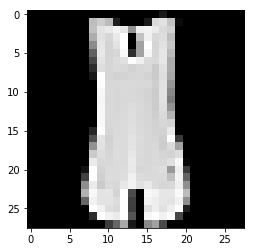

In [39]:
plt.imshow(training_images[4].reshape(28,28), cmap='gray')
plt.show()

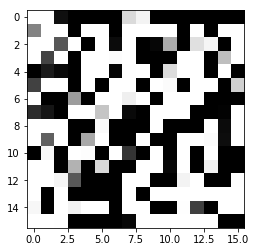

In [40]:
plt.imshow(reconstructed_images_reduced_dim[4].reshape(16,16), cmap='gray')
plt.show()

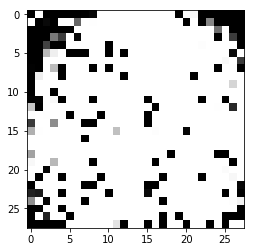

In [42]:
plt.imshow(reconstructed_images[4].reshape(28,28), cmap='gray')
plt.show()

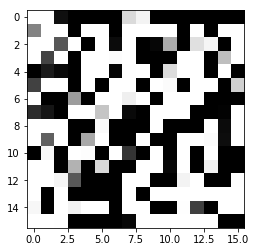

In [46]:
plt.imshow(np.reshape(reconstructed_images_reduced_dim[4], (16,-1)), cmap='gray')
plt.show()